In [2]:
def plot_array(plt, shape=(1, 10), cmap='viridis'):
    colors = ('black', 'white')
    array = np.linspace(0, 10, shape[0] * shape[1]).reshape(shape)
    plt.figure()
    plt.imshow(array, cmap=cmap)
    if len(shape) == 2:
        if shape[0] == 1:
            gen = (i for i in range(shape[1]))
        else:
            gen = ("[{},{}]".format(i, j)
                   for i in range(shape[0]) 
                   for j in range(shape[1]))
        for i, j in ((i, j) for i in range(shape[0]) for j in range(shape[1])):
            plt.text(j, i, gen.send(None), ha='center', va='center', 
                     size=15 if shape[0] != 1 else 20, 
                     color=colors[1 if array[i, j] < 5 else 0])
    else:
        raise ValueError('Only support for 1/2-d array')
    plt.axis('off')
    plt.title("{}-d array with shape {}".format(1 if array.shape[0] ==1 else 2,
                                                              array.shape))

def plot_linspace(a1,  a2, num, figsize=(5, 2)):
    plt.figure(figsize=figsize)
    plt.plot(a2, np.zeros(num) - 0.1, 'o')
    plt.plot(a1, np.zeros(num) + 0.1, 'o')
    plt.ylim([-0.2, +0.2])
    plt.yticks([])
    
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# 一. 用 Numpy 做矩阵运算

`Numpy`是一个支持多维数组、矩阵快速运算的科学计算包，其自带众多针对数组运算的数学函数，极大的简化了向量和矩阵的操作。正因为如此，众多软件包使用Numpy作为其基础构架，比如`scipy`, `pandas`, `scikit-learn`，`matplotlib`等科学计算、数据科学和绘图库。`numpy`以及这些依赖`numpy`的软件包，形成了一个强大的科学计算环境。

## 1. numpy.ndarray 对象
`ndarray`是`numpy`的基本对象，用于存储一个元素`数据类型相同`，元素`数量固定`的多维数组。 我们先来看看`ndarray`大致形状以及其表现形式：

**一维数组**：用于表示一个一维的序列。时间序列就是一维的，该序列中的每个元素对应不同时刻下的值(信号强度，音频信号，股票价格等)。并且一维数组和`list`非常相似，都可以对他们进行索引，切片和迭代。

<center>
<img src="https://image.jiqizhixin.com/uploads/editor/66728456-1b34-4959-b3f6-6d752e6566d2/640.jpeg" width=600 height=400></img>
</center>

**二维数组**：类似于我们数学中的**矩阵**，拥有两个维度。一张黑白图像就是二维的`(高度x宽度)`，图片中的每个像素可以用单个数字来表示(0为黑色, 255为白色)。

<center>
<img src="https://image.jiqizhixin.com/uploads/editor/90fdf430-6175-4219-bc23-815467983dfa/640.jpeg" width=600 height=300></img>
</center>

再比如日常生活中使用的电子表格，也拥有行与列两个维度，所以可以使用二维的`ndarray`进行表示。(`pandas`就是干这个的, 并且`pandas`也是在`numpy`的`ndarray`基础上构建的)

<center>
<img src="https://image.jiqizhixin.com/uploads/editor/8d1005ba-90f9-4f6c-948a-fee4e0325202/640.jpeg" width=600 height=300></img>
</center>

**多维数组**：拥有多个维度。上图为**黑白图像**，其**灰度**只需要用一个数字(0-255)就可以进行表示，所以可以用一个**二维数组**来表示；我们知道一张彩色图片的每个像素点的颜色可以用**RGB**来表示-**红、绿、蓝**。因此，我们的数据是三维的`(高度x宽度x3)`，需要用一个**三维数组**来表示。更一般的，还可以拓展到更多维的情况。

<center>
<img src="https://image.jiqizhixin.com/uploads/editor/8bb580d3-e418-4205-ac2d-05cd2f8a212e/640.jpeg" width=600 height=300></img>
</center>

### 1.1 `ndarray` 对象的基本属性:
有了上面的抽象表示，我们来看看`ndarray`这个类的对象具有哪些基本属性，通过一个对象的基本属性，可以大致的了解一个对象具有哪些性质。

In [179]:
array = np.array([[1, 2, 3, 4],
                 [4, 5, 6, 7]], dtype=np.float32)
array

array([[1., 2., 3., 4.],
       [4., 5., 6., 7.]], dtype=float32)

- `ndarray.ndim` 表示多维数组的维度数目或轴数，对于array而言，其有两个轴，可以理解为成坐标轴的形式，第一个轴表示不同行，第二个轴表示不同列

In [84]:
array.ndim

2

- `ndarray.shape` 表示多维数组的大小，是一个**整数元组**，期内各个值分别表示不同轴的长度。对array这个二维数组而言，类似于一个2行3列的矩阵。

In [86]:
array.shape

(2, 4)

- `ndarray.size` 多维数组的元素总数，等于shape中各个值得乘积。

In [90]:
array.size              # 2行3列的矩阵自然有8个元素

8

- `ndarray.dtype` 用于描述数组中`元素类型`的对象。可以在`np.array()`构造函数或其他创建`ndarray`的函数中指定元素的类型。

>注：`np.ndarray` 与 `list` 的一个主要的区别就是: `ndarray`是`固定`元素类型、元素数量的，而`list`可以动态的增减元素。

In [156]:
array.dtype                        

dtype('float64')

- `ndarray.itemsize` 表示数组中每个元素所占用的字节数

In [99]:
array.itemsize                    # 元素类型为float32， 所以占用 4 bytes = 32 bits / 8 bits

4

上面我们看到了ndarray的抽象表现形式以及基本的属性，现在我们来看看如何创建一个`ndarray`, 下面将介绍一些比较常用的方法。

### 1.2 从现成的数据生成`ndarray`

- `np.array()` 上面已经用到过这个函数了，可以根据存在python内置的数据类型比如list中的数据，创建一个`ndarray`。其中的`dtype`参数可以使用如`float` `int` `double`等标准python类型，也可以使用numpy提供的`np.int32` `np.int16` `np.float64`等对象。

>注：数据对象必须作为第一个参数传入, 多维数组需要使用嵌套的数组(或tuple, range)

In [3]:
array = np.array([[1, 2, 3, 4],
                 [4, 5, 6, 7]], dtype=np.float64)    # 如果没有特别的要求，numpy会自动选择合适的dtype
array.dtype
array

dtype('float64')

array([[1., 2., 3., 4.],
       [4., 5., 6., 7.]])

- `np.copy()`或 `ndarray.copy()` 返回一个已有的`ndarray`的拷贝

In [176]:
array.copy()

array([[4., 4., 4.],
       [4., 4., 4.],
       [4., 4., 4.]])

### 1.3 生成指定大小和元素类型的`ndarray`。

前面说过，由于`ndarray`不能动态的删减元素(删减元素需要重新生成相应大小的`ndarray`, 并拷贝相应的数据，相比于`list`而言，非常低效)，所以使用`numpy`的时候经常需要使用这些函数创建指定容量的数组(预先分配相应大小的空间，供计算结果使用)。

#### 1.3.1 `np.zeros()`/`np.ones()`/`np.empty()` 用于创建拥有指定大小(`shape`)和元素类型(`dtype`)的多维数组，并且使用`0/1`填充整个数组，即初始化整个数组。

In [175]:
np.zeros((3, 4), dtype=np.int)

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

`np.empty()` 函数生成的数组元素没有初始值，元素的值是随机的，取决于内存的实际状态。

In [174]:
np.empty((2, 2, 1))

array([[[2.00000047e+00],
        [5.12000123e+02]],

       [[2.04800049e+03],
        [3.27680079e+04]]])

#### 1.3.2 `np.zeros_like()`/`np.ones_like()`/`np.empty_like()` 在很多计算中，输入数据(数组)和输出数据(数组)的大小是一样的，可以使用这些函数生成与输入数据大小相同，元素类型相同的数组。

In [4]:
new_array1 = np.zeros_like(array)
new_array2 = np.ones_like(array, dtype=np.float64)            # 还可以指定想要的dtype
new_array1.dtype
new_array1
new_array2.dtype
new_array2

dtype('float64')

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.]])

dtype('float64')

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.]])

#### 1.3.3 `np.full`/`np.full_like` 更一般的情况，还可以指定用于填充数组的初始值。

In [173]:
np.full((3, 3), fill_value=3, dtype=np.int)
np.full_like(array, fill_value=4, dtype=np.float)

array([[3, 3, 3],
       [3, 3, 3],
       [3, 3, 3]])

array([[4., 4., 4.],
       [4., 4., 4.],
       [4., 4., 4.]])

#### 1.3.4 `np.arange()`/`np.linspace()`/`np.logspace()` 用于创建等差或等比数列(`ndarray`)。

##### 1.3.4.1 `np.arange()` 用于创建等差数列，用法和功能和python的`built-in`函数`range`相似，只不过这个函数返回的是`ndarray`。

> 再次提醒: `[start, stop)`为一个左闭右开的区间(`不包括stop`)，返回的数列为间距为`step`的等差数列。

In [182]:
np.arange(10)         # 等价于 np.arange(start=0, stop=10, step=1)
np.arange(5, 10, 2)   # 等价于 np.arange(start=5, stop=10, step=2)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

array([5, 7, 9])

##### 1.3.4.2 `np.linspace(start, stop, num=50, endpoint=True, retstep=False)` 也是用于创建等差数列，不过用法要稍微复杂点。其中`restep`设为`True`则返回的结果是一个元组，第一个元素还是等差数列(`ndarray`), 第二个元素则是等差数列的`step`。我们来看下面的例子：

(array([ 2.        ,  4.66666667,  7.33333333, 10.        ]),
 2.6666666666666665)

(array([2., 4., 6., 8.]), 2.0)

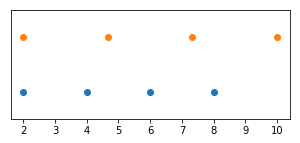

In [205]:
x1, step1 = np.linspace(2, 10, 4, endpoint=True, retstep=True)
x2, step2 = np.linspace(2, 10, 4, endpoint=False, retstep=True)
plot_linspace(x1, x2, 4)
x1, step1
x2, step2

可以看到，等差数列第一个元素都是`start`(那是肯定的)，关键就在于返回的等差数列的间距`step`不同。
1. 如果`endpoint`设为`True`, 表示返回的等差数列的最后一个元素是`stop`。等差数列**首元素**和**末元素**都已经确定，而等差数列总数为`4`，中间还需要插入`2`个点, 则`step`为：$$\left(10 - 2\right) / \left(2 + 1\right) = 2.666$$
2. 如果`endpoint`设为`False`, 则只有**首元素**是确定的，而等差数列总数为`4`，中间还需要插入`3`个点，则`step`为： $$\left(10 - 2\right) / \left(3 + 1\right) = 2$$
3. 知道了`step`、首元素`start`和**元素数量**，自然就可以计算求出整个等差数列了。

##### 1.3.4.3 `np.logspace()` 函数生成的是**等比数列**, 使用方法和`np.linspace`一样。唯一的不同是该函数需要指定一个**指数**(默认为10)。

array([ 4.        , 10.0793684 , 25.39841683, 64.        ])

array([ 4.,  8., 16., 32.])

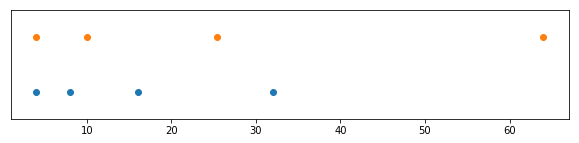

In [5]:
x1 = np.logspace(2, 6, 4, endpoint=True, base=2)
x2 = np.logspace(2, 6, 4, endpoint=False, base=2)
plot_linspace(x1, x2, 4, figsize=(10, 2))
x1
x2

如果说`np.linspace()`返回的是`[start, stop)`之间的**等差数列**，那么`np.logspace()`返回的就是`[base**start, base**stop)`之间的**等比数列**。比值就是上面的例子中计算出来的`step`。下面的例子展示了他们之间的关联:

array([2.        , 3.33333333, 4.66666667, 6.        ])

array([2., 3., 4., 5.])

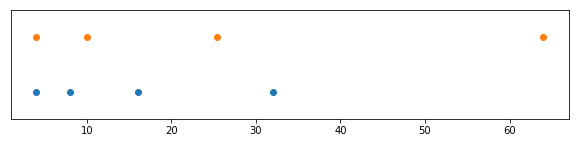

In [223]:
x1 = np.linspace(2, 6, 4, endpoint=True)          # 注意使用的是 linspace
x2 = np.linspace(2, 6, 4, endpoint=False)         # 注意使用的是 linspace
plot_linspace(np.power(2, x1), np.power(2, x2), 4, figsize=(10, 2))     # np.power(base, exponents) 为幂函数
x1
x2

可以看到，两种方式是等价的。

In [374]:
a = np.arange(25).reshape(5, 5)
a[[, 2, 3]]


array([[ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

## 2 索引

`ndarray`支持python中`x[obj]`的索引语法。根据`obj`类型的不同，可以分为三大类。**基本索引**、**高级索引**和**字段访问**。这一节介绍`基本索引`这种与python内置序列索引方式相似的索引模式。

### 基本索引
在这种索引模式下，`obj`可以是**整数(integer)**，**slice对象(start: stop : step)**, 或是一个**元组**, 这元组中包含`integer`或是`slice`对象。

> 注意:`x[(exp1, exp2, ...expN)]` 是与 `x[exp1, exp2, ...exp3]` 是等价的。所以后续都采用`x[exp1, exp2, ...exp3]`这种方式进行说明。

一维数组的索引方式和`list`等内置类型几乎没有区别。

> 注: `iterator Types` 见https://docs.python.org/3/library/stdtypes.html#iterator

In [291]:
array = np.arange(0, 15, 2)
array
array[2]                                 # 索引
array[2:7:2]                             # 切片，step为 2
array[3:6] = -4                          # 切片，并赋值
array[::-2]                              # 反序切片, step为-2
for i in array[::-1]:                    # 切片, 并迭代
    print(i)

array([ 0,  2,  4,  6,  8, 10, 12, 14])

4

array([ 4,  8, 12])

array([14, -4, -4,  2])

14
12
-4
-4
-4
4
2
0


这些操作可以被泛化到**多(N)维数组**中，即将操作细分到**每一个维度(轴)**上进行。对多维数组不同轴的**整数索引/切片**需要用`','`进行分隔`x[obj1, obj2,..,objN]`，`obj`可以是`integer`或者`slice`。

In [382]:
a = np.array([[ 0,  1,  2,  3],
          [ 4,  5,  6,  7],
          [ 8,  9, 10, 11],
          [12, 13, 14, 15]])
a
a[:, 1]           # 第一个轴完整切片，表示取所有行，第二个轴使用索引1，表示取第二列，返回的是长度为5的一维数组
a[0:5, 1]         # 与上面等价
a[0: 2, 1:3]      # 通过行切片取出前两行，通过列切片又取出前两行中间的两列

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

array([ 1,  5,  9, 13])

array([ 1,  5,  9, 13])

array([[1, 2],
       [5, 6]])

<center>
<img src="https://i.imgur.com/s9vWrGf.png" width=600 height=300></img>
</center>

对多维数组进行**整数索引/切片**的时候需要注意两种方式的**区别**：对某个轴进行**整数索引**后返回的数组**轴数减少**，使用**切片**则能保持**轴数不变**。如：

In [288]:
a = np.random.randn(5, 5)
a[1,:].shape, a[1, :]       # 虽然两语句都是为了取出第2行，但是使用索引会使得二维数组变为一维数组
a[1:2, :].shape, a[1:2, :]

((5,),
 array([ 1.33472536,  0.75149882, -2.23568792,  0.68340291, -1.95378406]))

((1, 5),
 array([[ 1.33472536,  0.75149882, -2.23568792,  0.68340291, -1.95378406]]))

可以省略**后面多个轴**的索引/切片，缺失的索引/切片将会被视为**完整的切片**，即`:`

In [283]:
a[1:2]             # 可以省略后面轴的索引/切片， 取出下标为1的那行
a[1:2, :]          # 这两种方式时等价的
b = np.random.randn(2,2,2)# 注意和一般生成数组的方式不同，这里以多个位置参数的方式指定轴数和各轴的长度
b
b[1:2, 1]          # 省略最后一个轴的索引/切片
b[1:2]             # 省略最后两个轴的索引/切片

array([[-1.33833989,  0.24542238,  0.13641075,  0.32937989, -1.48232152]])

array([[-1.33833989,  0.24542238,  0.13641075,  0.32937989, -1.48232152]])

array([[[ 0.47188134, -0.00618902],
        [ 1.11793864, -0.55524621]],

       [[-0.5535917 ,  0.95428727],
        [ 1.02390199,  0.54854368]]])

array([[1.02390199, 0.54854368]])

array([[[-0.5535917 ,  0.95428727],
        [ 1.02390199,  0.54854368]]])

还可以用`...`来表示尽可能多的轴的完整切片。比如一个五维的数组`a`：
- `a[1, 2,...]` 等价于 `a[1, 2, :, :, :]`
- `a[..., 3]` 等价于 `a[:, :, :, :, 3]`
- `a[1, ...,3, :]` 等价于 `a[1, :, :, 3, :]`

使用**基本索引**取得的数组并不拥有真正的数据，只是**引用**了被索引数组中的数据， 并没有**拷贝**数据并生成**新的数组**。所以，对**基本索引得到的数组**的任何操作实际上都是在原始数组中的数据上进行，以**赋值**为例:

> 注：`nunpy` 的很多操作都是返回这种数组(并不用用于数据，引用其他对象的数据)，这种数组也称为`view`,后续会介绍。

In [403]:
a = np.arange(25).reshape(5, 5)
a
indexed = a[1:4, 1:4]
indexed[:] = 0
indexed
a
a[1:4, 1:4] =0          # 简化操作，不保存中间变量
a = 0                   # 注意这是把0值赋给了a变量，相当于修改了a变量引用的对象。
a                       # 修改一个对象的内部属性，只能通过调用该对象提供的方法，这里索引操作类似于调用对象的一个方法。

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

array([[ 0,  1,  2,  3,  4],
       [ 5,  0,  0,  0,  9],
       [10,  0,  0,  0, 14],
       [15,  0,  0,  0, 19],
       [20, 21, 22, 23, 24]])

0

可以看到通过修改`indexed`数组的值，修改了原始数组的值。

### 迭代

对多维数组的**迭代**是针对**第一个维度(轴)**进行的，使用`flat`属性可以对所用元素进行迭代。

In [265]:
a = np.array([[1, 2, 3, 4],
            [4, 5, 6, 7]])
for row in a:
    row
for i in a.flat:
    i

array([1, 2, 3, 4])

array([4, 5, 6, 7])

1

2

3

4

4

5

6

7

> 注意: 对`ndarray`进行迭代，效率很低，一般只会对长度较短的**轴**进行迭代。

## 3 数组转换

### 3.1 改变数组的形状

In [405]:
a = np.arange(25).reshape(5, 5)
b = a[1:4, 1:4]
b.T
a

array([[ 6, 11, 16],
       [ 7, 12, 17],
       [ 8, 13, 18]])

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

## 4 计算

### 4.1 基本统计方法

numpy.ndarry对象统计方法的共性比如axis

举几个例子

### 4.2 广播

### 4.3 判断

all

any

nonzero

where

### 4.4 基本线性代数函数

dot

corref

svd

eig

## 5 高级索引（使用整数数组和布尔数组进行索引）

Numpy还提供比常规python序列更强大的索引功能，即通过**整数数组**和**布尔数组**进行索引，这种索引方式可以极大的提高我们操控数组的灵活性。

### 5.1 整数数组索引

**整数数组索引**的方式与一般的索引所表达的意思一样，就是在**各个轴上**进行索引，并且不同轴的索引使用逗号`,`进行分隔。与一般索引不同的是，`x[obj]/x[obj1, obj2...,objN]`中的obj是**整数**`ndarray`。下面举个例子：

通过使用一个**二维ID(palette行索引)数组**对`palette`的**第一个轴**进行索引，可以获得一个彩色图片**(高, 宽，三种色彩)**-即**三维数组**。

('palette:', (5, 3))

array([[  0,   0,   0],
       [255,   0,   0],
       [  0, 255,   0],
       [  0,   0, 255],
       [255, 255, 255]])

('image:', (2, 4))

array([[0, 1, 3, 4],
       [4, 3, 2, 0]])

('Index pallete with image', (2, 4, 3))

array([[[  0,   0,   0],
        [255,   0,   0],
        [  0,   0, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [  0,   0, 255],
        [  0, 255,   0],
        [  0,   0,   0]]])

<Figure size 360x144 with 0 Axes>

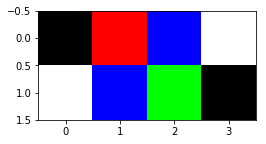

In [414]:
palette = np.array( [ [0,0,0],                # black
                       [255,0,0],              # red
                       [0,255,0],              # green
                       [0,0,255],              # blue
                       [255,255,255] ] )       # white
image = np.array( [ [ 0, 1, 3, 4 ],           # each value corresponds to a color in the palette
                    [ 4, 3, 2, 0 ]  ] )
"palette:", palette.shape
palette
'image:', image.shape
image
"Index pallete with image", palette[image].shape
palette[image]                               # the (2,4,3) color image
plt.figure(figsize=(5,2));plt.imshow(palette[image])

这个例子中，索引只有一个`ndarray`，所以表示对`palette`数组的**第一个轴**进行索引，即索引`ndarray`中的每个值对应`palette`中的一行。通过**索引**取出所有元素相对应的**行**从而得到最后的数组。可以理解为：
- 将每个索引值**替换**为通过该索引值取出的**元素(行）**。
- 即: 原来的索引数组的`shape`为`(2, 3)`，将每个元素**替换**为`palette`中的**某行**(`shape`为`(3, )`), 所以最后返回的数组`shape`为`(2, 4, 3)`。

上面的例子中，我们只对第一个轴进行了索引，还可以和基本索引一样，对**对多个轴**同时进行索引(使用**逗号**分隔开或者使用`ndarray`的**元组**)，不过会稍微难理解一些, 这里我们举一个比较常见的例子。

有的时候，通过某些筛选条件，已经知道了符合条件的元素的**行索引和列索引**, 这种情况下就可以利用整数数组索引同时对目标数组的两个轴进行索引：

In [368]:
a = np.arange(25).reshape(5, 5)
a
target_x = np.array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4])
target_y = np.array([0, 1, 2, 3, 4, 4, 3, 2, 1, 0])
a[target_x, target_y]

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

array([ 0,  6, 12, 18, 24,  4,  8, 12, 16, 20])

可以看到，我们为了取出**两个对角线**上的元素，将每个元素的**行和列索引**分别放在两个**一维数组**中，最后得到的是一个**一维数组**，形状和**索引数组**的形状一致。以index得到的数组中的`16`为例：
- 根据之前的索引规则，`target_x`在第一个位置，表示着对目标数组的**第一个轴**进行索引， `target_y`在第二个位置，表示着对目标数组的**第二个轴**进行索引。
- `16`对应`target_x中`的`3`, `target_y`中的`1`。
- 行索引值`3`表明要取的元素为第4(0-based)行`array([15, 16 ,17, 18, 19])`。
- 列索引值`1`表明要取得元素为第1(0-based)列，所以最终取得得元素为**第4行**得**第1列**。
- 其他元素也是这种取法

`numpy`的许多操作/函数都会返回一个包含所需元素的**行索引和列索引数组**的元组: `(x_indices, y_indices)`, 这里先简单的看下，后续还会再提及：

In [373]:
a = np.arange(25).reshape(5, 5)
a
x, y = np.where(a > 12)
x, y
a[x, y]

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

(array([2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4], dtype=int64),
 array([3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4], dtype=int64))

array([13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24])

上面的例子还说明了一个规则: 如果对**多个轴**进行**整数数组索引**，各个索引数组的`shape`必须一致。

> 注：实际上很多情况下都不必遵守这个规则，因为有`广播`这一特性，`numpy`会自动的为我们调整数组的形状以满足这个规则，后续会说到`广播(boradcasting)`。

### 5.2 布尔数组(mask)索引

通过这个名字很容易猜出，这种索引方式不是通过**索引值(行/列的下标)**进行索引数组，而是通过**布尔值**，决定**保留**哪些值(舍弃哪些值)。当用于索引的对象`obj`为**布尔数组**(`ndarray`)则会触发布尔数组索引。

由于布尔数组索引是根据每个索引的`True/False`值决定保留哪些元素，所以布尔数组索引只能是**一个ndarry**(不能是多个(元组))，且布尔数组索引的`shape`要与被索引数组的`shape`一致。

> 注意: 和整数数组索引中的规则一样，由于存在**广播**的原因，很多情况下都不用满足这个条件，`numpy`会自动的调整数组形状以满足该条件。后续会涉及到**广播**这(`broadcsting`)一概念。

SyntaxError: invalid syntax (<ipython-input-361-45877ab1f7d7>, line 2)

## 5 `view`和`copy`

## 6 Matrics和Sparse Matrix(稀疏矩阵)

### 7.1 matrics

### 7.2 scipy.sparse

## 8 IO以及Structured Array

### 8.1 structured array

### 8.2 从文件种读取数据

## 9 ndarray在内存中的储存方式

首先再次强调`ndarray`的几个重要`Attributes`，通过后面的讲解你会对这些属性有更新的认识：

In [19]:
array = np.array([[1, 2, 3, 4], [4, 5, 6, 7]], dtype=np.float32)
array.shape     # 对于n维数组，返回长度为n的元组，表示数组的大小，即数组在各个维度的长度
array.dtype     # 数组每个元素的类型，float32表明每个元素占用4字节-32bit
array.strides   # 见后

(2, 4)

dtype('float32')

(16, 4)

### 9.1 元素在内存中的布局

在了解了ndarray的抽象数据表示(声音序列、图像、矩阵)和一般性操作后，我们来看看ndarray在计算机内存中是怎么表示的呢(当然不可能和抽象表示一样，三维以下还有可能，更高维相像都想不出)。

计算机内存本质上是线性的(一维), 其基本结构是线性排列的一批储存单元，一般一个单元为1byte(8bit)，每个单元有其唯一的编号-单元地址，程序通过地址进行访问，存取数据；对于一维数组很好办，按照元素的顺序一个一个排列就行了，对于N维数组呢？

#### Row Major

<center>
<img src="https://eli.thegreenplace.net/images/2015/row-major-2D.png" width=500 height=300></img>
</center>

#### Column Major

<center>
<img src="https://eli.thegreenplace.net/images/2015/column-major-2D.png" width=500 height=300></img>
</center>

没错，还可以这么线性存储。只要按照一定的规则来存储，就可以通过计算元素所在的地址来访问对应的元素，从而将多维数组的每个元素映射到内存中的某个位置。我们以上图的`Row Major`存储方式来举例(对于`numpy.ndarray` 而言, 默认为按行存储)：

> 注：`ndarray`与`python`内置的数据类型如`list`的最主要的区别就在于元素的存储方式上，`list`是动态数组，其元素(对象)分散在内存中的各个地方，`list`对象通过一个引用数组(类似于地址)记录各个元素所在的位置。在进行大量数据计算的时候，`numpy.ndarray`这种顺序存储的方式能够使得现代CPU对计算进行更多的优化， 这也是numpy速度快的一个原因。详情见下方链接。

可知，第`i行`第`j`列的元素在内存中的地址相对于`首元素地址`的偏移为：$$offset = row \times ncols + col$$

因此知道了首元素的地址和需要访问的元素所在的行和列，就可以通过计算偏移的方式寻找到相应元素的地址了。

我们来看看`ndarray`中的元素的默认存储顺序:

In [107]:
array = np.array([[1, 2, 3, 4],
                  [4, 5, 6, 7]], dtype=np.int8) # 这里注意选择dtype为int8（每个元素占用一个字节)
raw_bytes = array.tobytes('A')                  # 'A' 表明按照元素储存的顺序输出bytes序列，否都会以Row major的顺序输出元素
" ".join(str(x) for x in raw_bytes)
raw_bytes[1 * 4 + 2]                            # 可以看到这两种方式取出来的值都相同
array[1, 2]

'1 2 3 4 4 5 6 7'

6

6

还有Column Major的存储顺序：

In [106]:
array = np.array([[1, 2, 3, 4],
                  [4, 5, 6, 7]],
                 dtype=np.int8, order='F')  # 使用order参数来指定元素在内存种的布局方式，F表示Fortan风格(Column Major)
raw_bytes = array.tobytes('A')              
" ".join(str(x) for x in raw_bytes)
raw_bytes[2 * 2 + 1]                        # 可以看到这两种方式取出来的值都相同
array[1, 2]

'1 4 2 5 3 6 4 7'

6

6

### 9.2 shape、dtype和strides

- 现在`shape`的作用就显而易见了(用于寻地址)。
- `dtype`也决定着如何寻址。上面的计算地址的公式默认了一个假设，那就是每个元素只占用一个字节, 而1字节最大只能用于表示`256(2**8)`, 所以存储一个正整数一般需要使用4个字节，对于浮点数则需要更多。现在寻址的偏移公式为:$$offset = \left( row \times ncols \times  + col \right) \times nbytes$$

#### strides 中文意思就是**步伐**

In [208]:
array = np.array([[1, 2, 3, 4], [4, 5, 6, 7]], dtype=np.float32)
array.strides
4 * 4, 1 * 4

(16, 4)

(16, 4)

- 如果要**跨行**遍历元素，比如先访问`array[0, 0]`后访问`array[1, 0]`那么需要移动几个字节呢，答案是 4 * 4 = **16字节**。
- 如果要**跨列**遍历元素，比如先访问`array[0,1]` 后访问`array[0,2]`呢，那么需要移动**4字节**（因为在Row Major中同一行的元素是仅靠着的）。
- 所以`strides`记录的是在不同维度移动一个单位时所需要的移动的偏移量(步伐)。

### 9.3 尽可能的使用vectorizing操作

举出几个不应该用ndarray的例子

In [409]:
# python 中的基本类型都是对象，所以，你可以很轻松的生成一个值很大的int值: 10000000000000000000000000000000
my_int = 1000000000000000000000000000000000000000000000000000000000000000
my_int
a = np.zeros((10000,))
b = [0]*10000
%timeit -n 50 c = [ i for i in a]
%timeit -n 50 d = [i for i in b ]
# python中的数值都是对象，而numpy中的数值想要提取出来，需要读取每个元素的值(读取字节)并经过一系列操作转换为int(python对象)。
# 所以尽可能的利用numpy所提供的vectorize的方式进行计算，让numpy进行计算。

1000000000000000000000000000000000000000000000000000000000000000

887 µs ± 51.4 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)
194 µs ± 1.17 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


> 详见:<br>
> https://eli.thegreenplace.net/2015/memory-layout-of-multi-dimensional-arrays/<br>
> https://www.jessicayung.com/numpy-arrays-memory-and-strides/<br>
> https://docs.scipy.org/doc/numpy/reference/arrays.ndarray.html<br>
> http://www.laurentluce.com/posts/python-list-implementation/

# 二、Pandas 处理表格数据

# 三、统计学习

## 1. Scipy科学计算

## 2. Statmodel

## 3. Scikit-Learn

### 3.1 scikit-learn 可以用来做什么

### 3.2 scikit-learn 怎么用

#### 3.2.1 基于numpy的数据表示

#### 3.2.2 数据预处理(Preprocessing)

#### 3.2.3 常见的机器学习任务(Common Tasks)

#### 3.2.3.1 分类(Classification)

#### 3.2.3.2 回归(Regression)

#### 3.2.3.3 聚类(Clustering)

#### 3.2.3.4 维度约减(Dimensionality reduction)

#### 3.2.4 模型的选择以及模型的评估

# 四、绘图

## Matplotlib

## Seaborn

## Bokeh